# Hospital Readmissions Data Analysis and Recommendations for Reduction

### Background
In October 2012, the US government's Center for Medicare and Medicaid Services (CMS) began reducing Medicare payments for Inpatient Prospective Payment System hospitals with excess readmissions. Excess readmissions are measured by a ratio, by dividing a hospital’s number of “predicted” 30-day readmissions for heart attack, heart failure, and pneumonia by the number that would be “expected,” based on an average hospital with similar patients. A ratio greater than 1 indicates excess readmissions.

### Exercise Directions

In this exercise, you will:
+ critique a preliminary analysis of readmissions data and recommendations (provided below) for reducing the readmissions rate
+ construct a statistically sound analysis and make recommendations of your own 

More instructions provided below. Include your work **in this notebook and submit to your Github account**. 

### Resources
+ Data source: https://data.medicare.gov/Hospital-Compare/Hospital-Readmission-Reduction/9n3s-kdb3
+ More information: http://www.cms.gov/Medicare/medicare-fee-for-service-payment/acuteinpatientPPS/readmissions-reduction-program.html
+ Markdown syntax: http://nestacms.com/docs/creating-content/markdown-cheat-sheet
****

In [2]:
%matplotlib inline

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import bokeh.plotting as bkp
from mpl_toolkits.axes_grid1 import make_axes_locatable
import seaborn as sns

In [3]:
# read in readmissions data provided
hospital_read_df = pd.read_csv('data/cms_hospital_readmissions.csv')

****
## Preliminary Analysis

In [4]:
# deal with missing and inconvenient portions of data 
clean_hospital_read_df = hospital_read_df[hospital_read_df['Number of Discharges'] != 'Not Available']
clean_hospital_read_df.loc[:, 'Number of Discharges'] = clean_hospital_read_df['Number of Discharges'].astype(int)
df = clean_hospital_read_df.sort_values('Number of Discharges')

C:\Users\eshai\AppData\Local\Continuum\anaconda3\lib\site-packages\pandas\core\indexing.py:517: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s


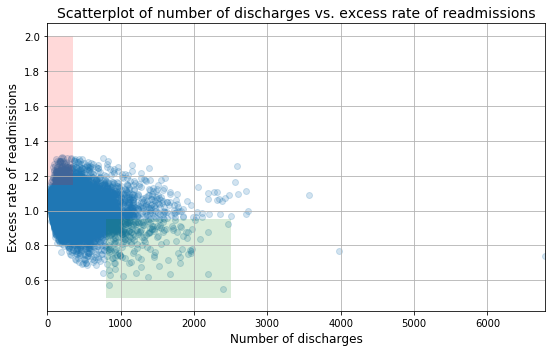

In [5]:
# generate a scatterplot for number of discharges vs. excess rate of readmissions
# lists work better with matplotlib scatterplot function
x = [a for a in clean_hospital_read_df['Number of Discharges'][81:-3]]
y = list(clean_hospital_read_df['Excess Readmission Ratio'][81:-3])

fig, ax = plt.subplots(figsize=(8,5))
ax.scatter(x, y,alpha=0.2)

ax.fill_between([0,350], 1.15, 2, facecolor='red', alpha = .15, interpolate=True)
ax.fill_between([800,2500], .5, .95, facecolor='green', alpha = .15, interpolate=True)

ax.set_xlim([0, max(x)])
ax.set_xlabel('Number of discharges', fontsize=12)
ax.set_ylabel('Excess rate of readmissions', fontsize=12)
ax.set_title('Scatterplot of number of discharges vs. excess rate of readmissions', fontsize=14)

ax.grid(True)
fig.tight_layout()

****

## Preliminary Report

Read the following results/report. While you are reading it, think about if the conclusions are correct, incorrect, misleading or unfounded. Think about what you would change or what additional analyses you would perform.

**A. Initial observations based on the plot above**
+ Overall, rate of readmissions is trending down with increasing number of discharges
+ With lower number of discharges, there is a greater incidence of excess rate of readmissions (area shaded red)
+ With higher number of discharges, there is a greater incidence of lower rates of readmissions (area shaded green) 

**B. Statistics**
+ In hospitals/facilities with number of discharges < 100, mean excess readmission rate is 1.023 and 63% have excess readmission rate greater than 1 
+ In hospitals/facilities with number of discharges > 1000, mean excess readmission rate is 0.978 and 44% have excess readmission rate greater than 1 

**C. Conclusions**
+ There is a significant correlation between hospital capacity (number of discharges) and readmission rates. 
+ Smaller hospitals/facilities may be lacking necessary resources to ensure quality care and prevent complications that lead to readmissions.

**D. Regulatory policy recommendations**
+ Hospitals/facilties with small capacity (< 300) should be required to demonstrate upgraded resource allocation for quality care to continue operation.
+ Directives and incentives should be provided for consolidation of hospitals and facilities to have a smaller number of them with higher capacity and number of discharges.

****
### Exercise

Include your work on the following **in this notebook and submit to your Github account**. 

A. Do you agree with the above analysis and recommendations? Why or why not?
   
B. Provide support for your arguments and your own recommendations with a statistically sound analysis:

   1. Setup an appropriate hypothesis test.
   2. Compute and report the observed significance value (or p-value).
   3. Report statistical significance for $\alpha$ = .01. 
   4. Discuss statistical significance and practical significance. Do they differ here? How does this change your recommendation to the client?
   5. Look at the scatterplot above. 
      - What are the advantages and disadvantages of using this plot to convey information?
      - Construct another plot that conveys the same information in a more direct manner.



You can compose in notebook cells using Markdown: 
+ In the control panel at the top, choose Cell > Cell Type > Markdown
+ Markdown syntax: http://nestacms.com/docs/creating-content/markdown-cheat-sheet
****

### A. Do you agree with the above analysis and recommendations? Why or why not?

I find the above analysis and recommendations hard to believe. It seems that these recommendations and analysis are based on the visual information available in the chart above and very minimal analysis of the data. Im skeptical of the conclusions in the report as well because there isnt much evidence in the report support these statements. The conclustion and recommendation may turn out to be right after some in depth analysis of the correlation between hospital readmissions and number of discharges but at this time we cannot be certain.

### B. Provide support for your arguments and your own recommendations with a statistically sound analysis:

#### 1. Setup an appropriate hypothesis test.

$H_{0}$: The distribution of Excess Readmission Rates for small hospitals/facilaties(less than 300 discharges) and large hospital/facilities(greater than 300 discharges) is the same.

$H_{A}$: The distribution of Excess Readmission Rates for small hospitals/facilaties(less than 300 discharges) and large hospital/facilities(greater than 300 discharges) is differemt.



In [6]:
# Drop irrelevant columns
df = df[['Number of Discharges', 'Excess Readmission Ratio']]

# Drop rows that are missing Discharge information 
df['Number of Discharges'] = pd.to_numeric(df['Number of Discharges'])

# Drop nulls 
df.dropna(axis=0, how='any', subset=['Excess Readmission Ratio'], inplace=True)

df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 11497 entries, 1832 to 13666
Data columns (total 2 columns):
Number of Discharges        11497 non-null int32
Excess Readmission Ratio    11497 non-null float64
dtypes: float64(1), int32(1)
memory usage: 224.6 KB


In [7]:
# Categorizing number of discharges into large and small:
large = df[df['Number of Discharges'] >= 300]['Excess Readmission Ratio']

small = df[df['Number of Discharges'] < 300]['Excess Readmission Ratio']

In [8]:
def ecdf(data):
    """Compute ECDF for a one-dimensional array of measurements."""

    # Number of data points: n
    n = len(data)

    # x-data for the ECDF: x
    x = np.sort(data)

    # y-data for the ECDF: y
    y = np.arange(1, n+1) / n

    return x, y

In [9]:
#View some summary Stats
print(large.describe())

print(small.describe())





count    5389.000000
mean        0.999871
std         0.101118
min         0.549500
25%         0.938500
50%         0.998600
75%         1.060800
max         1.583600
Name: Excess Readmission Ratio, dtype: float64
count    6108.000000
mean        1.014238
std         0.082478
min         0.760200
25%         0.961100
50%         1.006850
75%         1.056525
max         1.909500
Name: Excess Readmission Ratio, dtype: float64


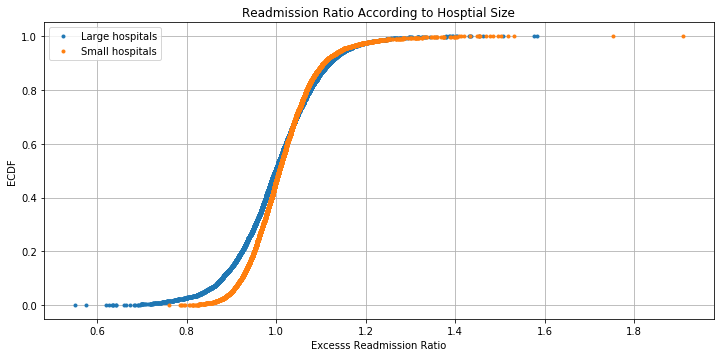

In [10]:
# Generate ECDF curves:
x_small, y_small = ecdf(small)

x_large, y_large = ecdf(large)

fig = plt.figure(figsize=(12, 12))

_ = plt.subplot(2,1,2)
_ = plt.plot(x_large, y_large, marker='.', linestyle='none')
_ = plt.plot(x_small, y_small, marker='.', linestyle='none')
_ = plt.ylabel('ECDF')
_ = plt.xlabel('Excesss Readmission Ratio')
_ = plt.title('Readmission Ratio According to Hosptial Size')
_ = plt.legend(('Large hospitals', 'Small hospitals'))

plt.grid()


Looking at the ecdf curve of ERR for small and large facilities, We notice that both sets of data are normally distributed around their perspective means. The mean ERR of small facilities(1.014261) is slightly higher at than the mean of large facilities(0.999781). Our sample data implies that we do have a difference in mean but we need to confirm this result is consistent over a simulated population by running a two sample permutation test.

In [11]:
#Test Difference of Mean.

# Define test statistic 
def diff_of_means(data_1, data_2):
    """Difference in means of two arrays"""
    return np.mean(data_1) - np.mean(data_2)

# Compute difference of mean for testing
diff = diff_of_means(small, large)

# Draw permutation replicates
perm_replicates = np.empty(10000)
for i in range(len(perm_replicates)): 
    
    # Permute the data
    combined = np.concatenate((small, large))
    combined_perm = np.random.permutation(combined)
    perm_large = combined_perm[:len(small)]
    perm_small = combined_perm[len(small):]
    
    #Draw replicates
    perm_replicates[i] = diff_of_means(perm_small, perm_large)

# Compute the p-value
p_value = np.sum(abs(perm_replicates) >= abs(diff)) / len(perm_replicates)

print('observed difference:',diff)
print('p-value:',p_value)

observed difference: 0.014367364156993245
p-value: 0.0


The our extremely low p value indicates that after running 10000 trails not even 1 generated a difference of mean as large as the observed difference of mean from the sample.We can conclude that the difference in ERR distribution for large and small facilities is statistically significant. Next lets take a look at the correlation between number of discharges and ERR.

In [12]:
#Create fucnction to compute correlation:
def pearson_r(x, y):
    
    corr_mat = np.corrcoef(x, y)
    
    return corr_mat[0,1]

In [13]:
# Slice Relevant columns out of data frame:
DIS = df['Number of Discharges']

ERR = df['Excess Readmission Ratio']


In [14]:
# Calculate Pearson Correlation Test Statistic:
cr = pearson_r(DIS, ERR)

print('The correlation coefficient is' ,cr)

The correlation coefficient is -0.0973979435108


Looking at our computed correlation coefficient, we can see that number of discharges and ERR from the sample arent correlated. We can test to verify that that our computed correlation coefficient is consistent accross a simulated population. 

$H_{0}$: Number of discharges and excess readmission rate are not correlated.

$H_{A}$: Number of discharges and excess readmission rate are correlated.

In [15]:
#Correlation Test (alpha = .05):

# Initialize permutation replicates: perm_reps
perm_reps = np.empty(10000)

# Draw replicates
for i in range(10000):
    # Permute Discharge measurments: DIS_permuted
    DIS_permuted = np.random.permutation(DIS)

    # Compute Pearson correlation
    perm_replicates[i] = abs(pearson_r(DIS_permuted, ERR))

# Compute p-value: p
p = np.sum(perm_replicates <= abs(cr) ) / len(perm_replicates)
print('p-val =', p)


p-val = 1.0


The above p value is exteremly high. Therefore the test has failed to reject the null hypothesis based on the information available. We can say that there might be a correlation between number of discharges and ERR, however the correleation may be extremely small.

### Report statistical significance for  αα  = .01.

Even if we change the level of significance for both test, the conclusion from both test will remain the same. 

### 4. Discuss statistical significance and practical significance. Do they differ here? How does this change your recommendation to the client?

Our analysis on the distribution of excess readmission rate implies the difference in the ERR means of large and small facilities is statistically significant. We can conclude that small facilities do have more readmission than predicted. Even though the difference in ERR across large and small facilities is statistically significant, doesn't mean its practically significant. The observed difference is so small and the p-value is so low, the difference in mean EER is negligible in terms of our problem. 

### Look at the scatterplot above.
### What are the advantages and disadvantages of using this plot to convey information?
### Construct another plot that conveys the same information in a more direct manner.

In [16]:
# Remove outliers from dataframe:
df = df[np.abs(df['Number of Discharges'] - df['Number of Discharges'].mean()) <= (3*df['Number of Discharges'].std())]


In [17]:
# Categorizing number of discharges into large and small:
large = df[df['Number of Discharges'] >= 300]

small = df[df['Number of Discharges'] < 300]

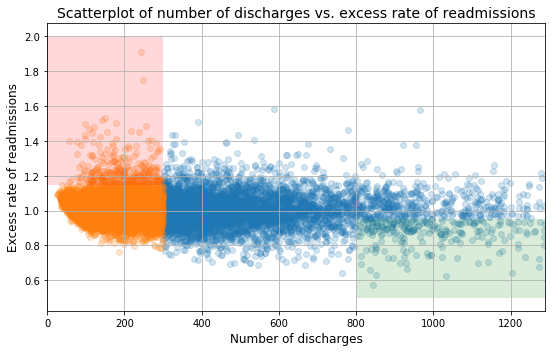

In [18]:
#sort and generate plots:
x_large = [a for a in large['Number of Discharges']]
y_large = list(large['Excess Readmission Ratio'])

x_small = [a for a in small['Number of Discharges']]
y_small = list(small['Excess Readmission Ratio'])

fig, ax = plt.subplots(figsize=(8,5))
ax.scatter(x_large, y_large,alpha=0.2)
ax.scatter(x_small, y_small,alpha=0.2)

ax.fill_between([0,300], 1.15, 2, facecolor='red', alpha = .15, interpolate=True)
ax.fill_between([800,2500], .5, .95, facecolor='green', alpha = .15, interpolate=True)

ax.set_xlim([0, max(x_large)])
ax.set_xlabel('Number of discharges', fontsize=12)
ax.set_ylabel('Excess rate of readmissions', fontsize=12)
ax.set_title('Scatterplot of number of discharges vs. excess rate of readmissions', fontsize=14)

ax.grid(True)
fig.tight_layout()

The advantage of plotting information on a scatter is that it a great oppourtunity to visualize the correlation between 2 variable. In the case of excess rate of readmission and number of discharges, we can barely make out a negative correlation between the to variables. A disadvantage of using a scatter plot is over plotting. As you can see above, a lot of dot are marked on top of one another. Overplotting makes it difficult to identify cluster and see all the values plotted.